In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.isomorphism as iso
import sympy
import numpy as np
import random
import time
import itertools
import math
from IPython.display import clear_output

def graphlet_list(k):
    assert k > 0
    foo = 1
    loc_graphlet_list = {n: [] for n in range(1,k+1)}
    while True:
        G = nx.graph_atlas(foo)
        n = G.number_of_nodes()
        if n>k:
            break
        if nx.is_connected(G):
            loc_graphlet_list[n].append(G)
        foo += 1
    return loc_graphlet_list

def find_type_match(T):
    n = T.number_of_nodes()
    if n==1:
        return((0, {u: 0 for u in T.nodes()}))
    if n==2:
        return((0, {u: i for i,u in enumerate(T.nodes())}))
    if n==3:
        if T.number_of_edges()==2:
            u0 = next((node for node in T.nodes() if T.degree(node)==2))
            (u1,u2) = (node for node in T.neighbors(u0))
            return((0, {u0: 0, u1: 1, u2: 2}))
        if T.number_of_edges()==3:
            return((1,{u:i for i,u in enumerate(T.nodes())}))
    if n==4:
        e_num = T.number_of_edges()
        max_degree = max((T.degree(node) for node in T.nodes()))
        if e_num==3 and max_degree==3:
            u3 = next((node for node in T.nodes() if T.degree(node)==3))
            (u0,u1,u2) = (node for node in T.neighbors(u3))
            return((0, {u0:0, u1:1, u2:2, u3:3}))
        if e_num==3 and max_degree==2:
            (u0,u1) = (node for node in T.nodes() if T.degree(node)==2)
            u2 = next((node for node in T.neighbors(u1) if node!=u0))
            u3 = next((node for node in T.neighbors(u0) if node!=u1))
            return((1, {u0:0, u1:1, u2:2, u3:3}))
        if e_num==4 and max_degree==3:
            u3 = next((node for node in T.nodes() if T.degree(node)==3))
            (u1,u2) = (node for node in T.nodes() if T.degree(node)==2)
            u0 = next((node for node in T.nodes() if T.degree(node)==1))
            return((2, {u0:0, u1:1, u2:2, u3:3}))
        if e_num==4 and max_degree==2:
            u0 = next((node for node in T.nodes()))
            (u1,u3) = (node for node in T.neighbors(u0))
            u2 = next((node for node in T.neighbors(u1) if node!=u0))
            return((3, {u0:0, u1:1, u2:2, u3:3}))
        if e_num==5:
            (u0,u2) = (node for node in T.nodes() if T.degree(node)==3)
            (u1,u3) = (node for node in T.nodes() if T.degree(node)==2)
            return((4, {u0:0, u1:1, u2:2, u3:3}))
        if e_num==6:
            (u0,u1,u2,u3) = (node for node in T.nodes())
            return((5, {u0:0, u1:1, u2:2, u3:3}))
    # Improve matching procedure here for n>4.
    GM = next((i, iso.GraphMatcher(T,T_)) 
              for (i,T_) in enumerate(cached_graphlet_list[n]) 
              if iso.GraphMatcher(T,T_).is_isomorphic())
    assert GM[1].is_isomorphic()
    return((GM[0],GM[1].mapping))

def find_type(T):
    n = T.number_of_nodes()
    if n==1:
        return 0
    if n==2:
        return 0
    if n==3:
        if T.number_of_edges()==2:
            return 0
        if T.number_of_edges()==3:
            return 1
    if n==4:
        e_num = T.number_of_edges()
        max_degree = max((T.degree(node) for node in T.nodes()))
        if e_num==3 and max_degree==3:
            return 0
        if e_num==3 and max_degree==2:
            return 1
        if e_num==4 and max_degree==3:
            return 2
        if e_num==4 and max_degree==2:
            return 3
        if e_num==5:
            return 4
        if e_num==6:
            return 5
    # Improve matching procedure here at least for n=4.
    GM = next((i 
              for (i,T_) in enumerate(cached_graphlet_list[n]) 
              if iso.GraphMatcher(T,T_).is_isomorphic()))
    return GM  

def subgraph(G, nodes):
    list_nodes = list(nodes)
    T = nx.Graph()
    T.add_nodes_from(nodes)
    for i in range(len(nodes)):
        for j in range(i):
            if list_nodes[i] in G.neighbors(list_nodes[j]):
                T.add_edge(list_nodes[i],list_nodes[j])
    return T

def random_walk_nodes(G, v0, steps_num):
    curr_vert = v0
    for _ in range(steps_num):
        curr_vert = random.choice(list(G.neighbors(curr_vert)))
    return curr_vert

def load_graph(name, k=3):
    ground_truth = None
    G = None
    if name=='bio-celegansneural':
        G = nx.read_edgelist(
            'Graphs/bio-celegansneural.mtx',
            create_using = nx.Graph(), data=(('weight',float),))
        if k==3:
            ground_truth = {0: 44081, 
                            1: 3241}
    if name=='ia-email-univ':
        G = nx.read_edgelist(
            'Graphs/ia-email-univ.mtx',
            create_using = nx.Graph())
        if k==3:
            ground_truth = {0: 80386, 
                            1: 5343}
    if name=='misc-polblogs':
        G = nx.read_edgelist(
            'Graphs/misc-polblogs.mtx',
            create_using = nx.Graph(), data=(('weight',float),))
        if k==3:
            ground_truth = {0: 1038396, 
                            1: 101096}
    if name=='misc-as-caida':
        G = nx.read_edgelist(
            'Graphs/misc-as-caida.mtx',
            create_using = nx.Graph(), data=(('weight',float),)) 
        if k==3:
            ground_truth = {0: 14797175, 
                            1: 36365}
    if name=='misc-fullb':
        G = nx.read_edgelist(
            'Graphs/misc-fullb.mtx',
            create_using = nx.Graph())
        for v in G.nodes():
            G.remove_edge(v,v)
        if k==3:
            ground_truth = {0: 162067420, 
                            1: 60212260}
        if k==4:
            ground_truth = {0: 1078734774,
                            1: 4837795036,
                            2: 2707584768,
                            3: 64898820,
                            4: 897215295,
                            5: 370980150}
    if G is None:
        raise KeyError
    return {'graph': G, 'ground_truth': ground_truth}

def waddling_mixing_variance(G, k, steps_num=1000, burn_in_limit=20):
    if k==4:
        return waddling_mixing_variance_4(G, steps_num=steps_num, burn_in_limit=burn_in_limit)
    if k==3:
        return waddling_mixing_variance_3(G, steps_num=steps_num, burn_in_limit=burn_in_limit)

def waddling_mixing_variance_3(G, steps_num=1000, burn_in_limit=20):
    k=3
    longest_paths = {0:2, 1:6}
    v0 = random.choice(list(G.nodes()))
    graphlet_num = len(cached_graphlet_list[k])
    exp_counter = {i:0 for i in range(graphlet_num)}
    type_counter = {i:0 for i in range(graphlet_num)}
    var_counter = {i:0 for i in range(graphlet_num)}
    corr_counter = {i: 
                    {burn_in: 0 
                     for burn_in in range(0,burn_in_limit)}
                    for i in range(graphlet_num)} 
    variance = {i:0 for i in range(graphlet_num)}

    memory = [None for _ in range(burn_in_limit)]
    for _ in range(steps_num):
        v1 = random_walk_nodes(G, v0, 1)
        v2 = random_walk_nodes(G, v1, 1)
        T = {v0, v1, v2}
        if len(T)==k:
            T_type = find_type(subgraph(G,T))
            T_prob = (longest_paths[T_type] *
                      G.degree(v1)**(-1) * 
                      (2*cached_edge_number)**(-1))
            type_counter[T_type] += 1 
            exp_counter[T_type] += (T_prob)**(-1)
            var_counter[T_type] += (T_prob)**(-2)
            ind = 0
            while ind < burn_in_limit and memory[ind] is not None:
                S_type, S_prob = memory[ind]
                if T_type==S_type:
                    #pair_counter[T_type][ind] += 1
                    corr_counter[T_type][ind] += 2*(T_prob*S_prob)**(-1)
                ind+=1
            memory = [(T_type, T_prob)] + memory[:-1]
        else:
            memory = [(-1, 0)] + memory[:-1]
        v0 = random_walk_nodes(G, v2, 1)

    beta_coeff = {i: [abs(corr_counter[i][burn_in]
                          *(steps_num - burn_in)
                          *exp_counter[i]**(-2) - 1) 
                      for burn_in in range(burn_in_limit)]
                  for i in range(graphlet_num)
                  if type_counter[i]!=0}
    
    for i in range(graphlet_num):
        if exp_counter[i]!=0:
            variance[i] = (var_counter[i]*(steps_num)
                           *(exp_counter[i])**(-2)-1)

    print("Expectation")
    for i in range(graphlet_num):    
        print(exp_counter[i]*(steps_num)**(-1))

    print("Variance")
    for i in range(graphlet_num):
        print(variance[i])

    for i in range(graphlet_num):
        print ("Graphlet ID{}".format(i))
        if exp_counter[i]!=0:
            for burn_in, val in enumerate(beta_coeff[i]):
                print("({0}, {1:.5f})".format(burn_in+1, val))
    return (beta_coeff, variance)

def waddling_mixing_variance_4(G, steps_num=1000, burn_in_limit=20):
    k=4
    longest_paths = {0:6, 1:2, 2:4, 3:8, 4:12, 5:24}
    v0 = random.choice(list(G.nodes()))
    graphlet_num = len(cached_graphlet_list[k])
    exp_counter = {i:0 for i in range(graphlet_num)}
    type_counter = {i:0 for i in range(graphlet_num)}
    var_counter = {i:0 for i in range(graphlet_num)} 
    corr_counter = {i: 
                    {burn_in: 0 
                     for burn_in in range(0,burn_in_limit)}
                    for i in range(graphlet_num)} 
    variance = {i:0 for i in range(graphlet_num)}
    expectation = {i:0 for i in range(graphlet_num)}

    memory = [None for _ in range(burn_in_limit)]
    for _ in range(steps_num/2):
        v1 = random_walk_nodes(G, v0, 1)
        v2 = random_walk_nodes(G, v1, 1)
        v3 = random_walk_nodes(G, v2, 1)
        T = {v0, v1, v2, v3}
        if len(T)==k:
            T_type = find_type(subgraph(G,T))
            T_prob = (longest_paths[T_type] *
                      (G.degree(v1)*G.degree(v2))**(-1) * 
                      (2*cached_edge_number)**(-1))
            type_counter[T_type] += 1 
            exp_counter[T_type] += (T_prob)**(-1)
            var_counter[T_type] += (T_prob)**(-2)
            ind = 0
            while ind < burn_in_limit and memory[ind] is not None:
                S_type, S_prob = memory[ind]
                if T_type==S_type:
                    #pair_counter[T_type][ind] += 1
                    corr_counter[T_type][ind] += (T_prob*S_prob)**(-1)
                ind+=1
            memory = [(T_type, T_prob)] + memory[:-1]
        else:
            memory = [(-1, 0)] + memory[:-1]
        v0 = random_walk_nodes(G, v3, 1)

    memory = [None for _ in range(burn_in_limit)]
    for _ in range(steps_num/2):
        v1 = random_walk_nodes(G, v0, 1)
        v2 = random_walk_nodes(G, v1, 1)
        v3 = random.choice(list(G.neighbors(v1)))
        T = {v0,v1,v2,v3}
        if len(T)==4 and find_type(subgraph(G,T))==0:
            T_prob = (longest_paths[0] *
                      (G.degree(v1))**(-2) * 
                      (2*cached_edge_number)**(-1))
            type_counter[0] += 1 
            exp_counter[0] += (T_prob)**(-1)
            var_counter[0] += (T_prob)**(-2)
            ind = 0
            while ind < burn_in_limit and memory[ind] is not None:
                S_type, S_prob = memory[ind]
                if S_type==0:
                    #pair_counter[0][ind] += 1
                    corr_counter[0][ind] += (T_prob*S_prob)**(-1)
                ind+=1
            memory = [(0, T_prob)] + memory[:-1]
        else:
            memory = [(-1, 0)] + memory[:-1]            
        v0 = random_walk_nodes(G, v2, 1)

    for i in range(graphlet_num):
        expectation[i] = exp_counter[i]*(steps_num/2)**(-1)
        variance[i] = (var_counter[i]*(steps_num/2)**(-1)
                       - expectation[i]**2)

    correlation = {i: [(corr_counter[i][burn_in]*(steps_num/2-burn_in)**(-1)- expectation[i]**2)
                       *(variance[i])**(-1)
                       for burn_in in range(burn_in_limit)] 
                   for i in range(graphlet_num) 
                   if variance[i]!=0}

    print("Expectation")
    for i in range(graphlet_num):    
        print(expectation[i])

    print("Normalized Variance")
    for i in range(graphlet_num):
        if expectation[i]!=0:
            print(variance[i]*expectation[i]**(-2))
        else:
            print("No graphlets found")

    for i in range(graphlet_num):
        print ("Correlation for Graphlet ID{}".format(i+1))
        if expectation[i]!=0:
            for burn_in, val in enumerate(correlation[i]):
                print("({0}, {1:.5f})".format(burn_in+1, val))
        else:
            print("No graphlets found")
    return (correlation, variance)

def waddling_count(G, k, steps_num, burn_in, ground_truth):
    if k==4:
        return waddling_count_4(G, steps_num=steps_num, burn_in=burn_in, ground_truth=ground_truth)
    if k==3:
        return waddling_count_3(G, steps_num=steps_num, burn_in=burn_in, ground_truth=ground_truth)

def waddling_count_3(G, steps_num, burn_in):
    k=3
    longest_paths = {0:2, 1:6}
    v0 = random.choice(list(G.nodes()))
    graphlet_num = len(cached_graphlet_list[k])
    exp_counter = {i:0 for i in range(graphlet_num)}
    samples = []
    #errors = {i:[] for i in range(graphlet_num)}
    for step in range(1, steps_num+1):
        v1 = random_walk_nodes(G, v0, 1)
        v2 = random_walk_nodes(G, v1, 1)
        T = {v0, v1, v2}
        if len(T)==k:
            if v0 in G.neighbors(v2):
                T_type = 1
            else:
                T_type = 0
            T_prob = (longest_paths[T_type] *
                      G.degree(v1)**(-1) * 
                      (2*cached_edge_number)**(-1))
            exp_counter[T_type] += (T_prob)**(-1)
        v0 = random_walk_nodes(G, v2, burn_in)
        samples.append([T,T_type,T_prob])

    return exp_counter, samples

def waddling_count_4(G, steps_num, burn_in,  ground_truth):
    assert k==4
    v0 = random.choice(list(G.nodes()))
    graphlet_num = len(cached_graphlet_list[k])
    exp_counter = {i:0 for i in range(graphlet_num)}
    longest_paths = {0:6, 1:2, 2:4, 3:8, 4:12, 5:24}
    for _ in range(steps_num/2):
        v1 = random_walk_nodes(G, v0, 1)
        v2 = random_walk_nodes(G, v1, 1)
        v3 = random_walk_nodes(G, v2, 1)
        T = {v0, v1, v2, v3}
        if len(T)==4:
            T_type = find_type(subgraph(G,T))
            assert T_type != 0
            T_prob = (longest_paths[T_type] *
                      (G.degree(v1)*G.degree(v2))**(-1) * 
                      (2*cached_edge_number)**(-1))
            exp_counter[T_type] += (T_prob)**(-1)
        v0 = random_walk_nodes(G, v3, burn_in)
        
    for _ in range(steps_num/2):
        v1 = random_walk_nodes(G, v0, 1)
        v2 = random_walk_nodes(G, v1, 1)
        v3 = random.choice(list(G.neighbors(v1)))
        T = {v0,v1,v2,v3}
        if len(T)==4 and find_type(subgraph(G,T))==0:
            T_prob = (longest_paths[0] *
                      (G.degree(v1))**(-2) * 
                      (2*cached_edge_number)**(-1))
            exp_counter[0] += (T_prob)**(-1)
        v0 = random_walk_nodes(G, v2, burn_in)
            
    expectation = {i: exp_counter[i] * (steps_num/2)**(-1)
                   for i in range(graphlet_num)}
    return expectation

def waddling_count_5(graph, steps_num, burn_in):
    v0 = random.choice(list(graph.nodes()))
    graphlet_num = len(cached_graphlet_list[k])
    exp_counter = {i:0 for i in range(graphlet_num)}
    longest_paths = {i:get_coefficient(g) for i, g in enumerate(gl[k])}
    
    for _ in range(steps_num):
        path = [v0]
        for i in range(5):
            path.append(random_walk_nodes(graph, v0, 1))
        unique_nodes = len(set(path))
        if unique_nodes == 3:
            neighbors = get_neighbors_path(path, graph)
            choices = [random.choice(neighbors) for i in range(2)]
            if len(set(choices)) == 2:
                T_type = 0
                T_prob = ((G.degree(path[1])**3) * 
                          (2*cached_edge_number) /
                          longest_paths[T_type])
                exp_counter[T_type] += T_prob
        
        if unique_nodes == 4:
            neighbors = get_neighbors_path(path, graph)
            choices = [random.choice(neighbors) for i in range()]
            if len(set(choices)) == 2:
                T_type = 0
                T_prob = ((G.degree(path[1])**3) * 
                          (2*cached_edge_number) /
                          longest_paths[T_type])
                exp_counter[T_type] += T_prob
        
        v0 = random_walk_nodes(G, path[-1], burn_in)

In [284]:
path = get_paths(gl[5][0], 3)[0]
neighbors = list(get_neighbors_path(path, gl[5][0]))

In [296]:
def add_nodes(path, l, G):
    if l >= 1:
        return [add_nodes(path + [neighbor], l-1, G)
                for neighbor in G.neighbors(path[-1])]
    else:
        return path

def get_num_paths(G, k):
    return len(get_paths(G, k))

def get_paths(G, k):
    nodes = list(G.nodes())
    paths = [add_nodes([node], k-1, G) for node in nodes]
    for i in range(k-1):
        paths = [item for sublist in paths for item in sublist ]
    return [ item for item in paths if len(set(item)) == k ]

def get_neighbors_node(node, graph):
    return set([item for item in graph.neighbors(node)])

def get_neighbors_path(path, graph):
    nset = set()
    for node in path:
        nset = nset.union(get_neighbors_node(node, graph))
    return nset - set(path)

def get_waddle_choices(path, graph):
    return get_neighbors_path(path, graph) - set(path)

def get_all_paths(G, k):
    nodes = list(G.nodes())
    paths = [add_nodes([node], k-1, G) for node in nodes]
    for i in range(k-1):
        paths = [item for sublist in paths for item in sublist ]
    return paths

def get_longest_simple_path_length(graph):
    l = len(graph.nodes())
    done = False
    while not done:
        if get_paths(graph, l):
            done = True
            break
        l -= 1
    return l

def get_longest_simple_path(graph):
    lspl = get_longest_simple_path_length(graph)
    return get_paths(graph, lspl)[0]

def get_degree_list(graph, path):
    return [graph.degree(node) for node in path]

def is_symmetric(graph):
    path = get_longest_simple_path(graph)
    return get_degree_list(graph, path) == get_degree_list(graph, list(reversed(path)))

def get_coefficient(graph):
    import math
    lspl = get_longest_simple_path_length(graph)
    if lspl == len(graph.nodes()):
        return len(get_paths(graph, lspl))
    pr = len(get_paths(graph, lspl))
    pw = math.factorial(len(graph.nodes()) - lspl)
    z = 1 if is_symmetric(graph) else 2
    return int(pr*pw/z)

In [303]:
cached_graphlet_list = graphlet_list(6)
def run_test(graph_name):
    cached_edge_number = G.number_of_edges()
    G = load_graph("bio-celegansneural")['graph']
    NUM_STEPS = 1000
    BURN_IN = 5
    expectation, samples = waddling_count_3(G, NUM_STEPS, BURN_IN)

In [264]:
[(i,g) 
 for i, g in enumerate(gl[5]) 
 if get_longest_simple_path_length(g) < 5]

[(0, <networkx.classes.graph.Graph at 0x11db8f240>),
 (1, <networkx.classes.graph.Graph at 0x11db8f828>),
 (3, <networkx.classes.graph.Graph at 0x11db8f9e8>)]

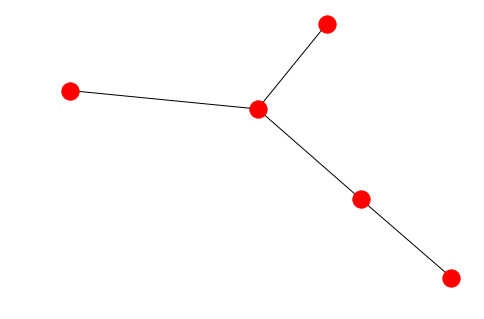

In [271]:
nx.draw(gl[5][1])

In [261]:
k = 5
{i:get_coefficient(g) for i, g in enumerate(gl[k])}

{0: 24,
 1: 2,
 2: 2,
 3: 4,
 4: 2,
 5: 4,
 6: 4,
 7: 10,
 8: 4,
 9: 8,
 10: 8,
 11: 14,
 12: 12,
 13: 12,
 14: 12,
 15: 20,
 16: 28,
 17: 36,
 18: 48,
 19: 72,
 20: 120}

In [83]:
epoch_num = 1000
steps_limit = 2000
graphlet_num = len(cached_graphlet_list[k])
step_range = list(range(0, steps_limit+1, 100)[1:])
error_sum = {i: [0]*(len(step_range)) for i in range(graphlet_num)}
for epoch in range(epoch_num):
    errors = waddling_count(G, 3, 
                            steps_num=steps_limit, 
                            burn_in=3, 
                            ground_truth=ground_truth)
    for i in range(graphlet_num):
        for (num, val) in enumerate(errors[i]):
            error_sum[i][num] += val
for i in range(graphlet_num):
    print("Graphlet ID{}".format(i+1))
    for (num, step) in enumerate(step_range):
        print("({0:}, {1:.5f})".format(step, error_sum[i][num]*(epoch_num)**(-1)))

Graphlet ID1
(100, 0.21038)
(200, 0.14962)
(300, 0.12307)
(400, 0.10366)
(500, 0.09349)
(600, 0.08580)
(700, 0.07893)
(800, 0.07353)
(900, 0.06916)
(1000, 0.06564)
(1100, 0.06184)
(1200, 0.05977)
(1300, 0.05698)
(1400, 0.05567)
(1500, 0.05436)
(1600, 0.05207)
(1700, 0.04993)
(1800, 0.04804)
(1900, 0.04707)
(2000, 0.04670)
Graphlet ID2
(100, 0.96184)
(200, 0.72128)
(300, 0.61744)
(400, 0.56829)
(500, 0.50202)
(600, 0.45440)
(700, 0.41766)
(800, 0.39734)
(900, 0.37226)
(1000, 0.35716)
(1100, 0.34162)
(1200, 0.32883)
(1300, 0.32097)
(1400, 0.31586)
(1500, 0.30484)
(1600, 0.29646)
(1700, 0.29160)
(1800, 0.28169)
(1900, 0.27841)
(2000, 0.27517)


In [48]:
k=3
cached_graphlet_list = graphlet_list(k)

In [84]:
load_gr = load_graph('misc-fullb',k)
G = load_gr['graph']
ground_truth = load_gr['ground_truth']
cached_edge_number = G.number_of_edges()
cached_vert_number = G.number_of_nodes()
print(cached_vert_number, cached_edge_number)

(199187, 5754445)


In [42]:
waddling_count(G, 3, steps_num=1000, burn_in=2)

{0: 45185.328, 1: 3225.58}

In [32]:
waddling_mixing_variance(G, k,steps_num=10**7) #misc-fullb

Expectation
1075536378.78
4848297882.52
2706268150.87
65424496.3505
897766985.192
370614851.832
Normalized Variance
10.1303898759
4.04767703818
3.49558468272
86.4375146774
3.50541456917
4.07933327868
Correlation for Graphlet ID1
(1, 0.00408)
(2, 0.00986)
(3, 0.00738)
(4, 0.00675)
(5, 0.00596)
(6, 0.00433)
(7, 0.00450)
(8, 0.00369)
(9, 0.00429)
(10, 0.00348)
(11, 0.00284)
(12, 0.00262)
(13, 0.00297)
(14, 0.00229)
(15, 0.00296)
(16, 0.00146)
(17, 0.00268)
(18, 0.00194)
(19, 0.00223)
(20, 0.00223)
Correlation for Graphlet ID2
(1, 0.00741)
(2, 0.00643)
(3, 0.00434)
(4, 0.00371)
(5, 0.00308)
(6, 0.00285)
(7, 0.00246)
(8, 0.00212)
(9, 0.00200)
(10, 0.00174)
(11, 0.00247)
(12, 0.00127)
(13, 0.00208)
(14, 0.00199)
(15, 0.00193)
(16, 0.00190)
(17, 0.00127)
(18, 0.00146)
(19, 0.00124)
(20, 0.00142)
Correlation for Graphlet ID3
(1, 0.00614)
(2, 0.00412)
(3, 0.00354)
(4, 0.00326)
(5, 0.00253)
(6, 0.00182)
(7, 0.00156)
(8, 0.00092)
(9, 0.00080)
(10, 0.00154)
(11, 0.00091)
(12, 0.00061)
(13, 0.00188

({0: [0.004082109768886911,
   0.009863244322474339,
   0.007376855599508308,
   0.006745515102712506,
   0.0059595025496738795,
   0.00432615529309583,
   0.004495925807680632,
   0.0036903038473755146,
   0.004290009685287128,
   0.0034798347436503134,
   0.002835304574611197,
   0.0026218153257130455,
   0.0029671505271133755,
   0.0022878167867501796,
   0.002963471567251949,
   0.0014628145153237578,
   0.0026826699723914355,
   0.0019375949423404023,
   0.00222829435546465,
   0.0022330394742224938],
  1: [0.007408463570276186,
   0.006426224233741803,
   0.004335954174213123,
   0.0037050864220796002,
   0.003083928462271125,
   0.002850936716805693,
   0.002463802030154186,
   0.002119492791397634,
   0.0019958109135240695,
   0.0017375298427395824,
   0.0024749202098068943,
   0.0012684120601524275,
   0.00208065404216689,
   0.00198971607623261,
   0.0019252759102234246,
   0.001903981675447623,
   0.001266881449210839,
   0.0014632508600804952,
   0.0012410135839558399,
   0

In [27]:
waddling_mixing_variance(G, k,steps_num=10**7) #misc-polblogs k=4

Expectation
7797169406.73
284612305.629
47050193.7103
412225.684385
1703029.19431
50583.6896919
Normalized Variance
9.02233532661
147.561182172
401.548761057
3131.94867075
2916.09413947
16203.647266
Correlation for Graphlet ID1
(1, -0.08661)
(2, 0.25328)
(3, -0.03103)
(4, 0.10620)
(5, -0.00502)
(6, 0.05408)
(7, 0.00535)
(8, 0.03085)
(9, 0.00839)
(10, 0.01908)
(11, 0.00780)
(12, 0.01339)
(13, 0.00681)
(14, 0.00961)
(15, 0.00618)
(16, 0.00653)
(17, 0.00520)
(18, 0.00472)
(19, 0.00436)
(20, 0.00428)
Correlation for Graphlet ID2
(1, -0.00378)
(2, -0.00184)
(3, -0.00043)
(4, -0.00127)
(5, -0.00033)
(6, 0.00006)
(7, 0.00031)
(8, -0.00016)
(9, -0.00008)
(10, -0.00005)
(11, -0.00019)
(12, 0.00054)
(13, 0.00004)
(14, -0.00051)
(15, -0.00020)
(16, 0.00056)
(17, -0.00003)
(18, 0.00037)
(19, 0.00007)
(20, -0.00060)
Correlation for Graphlet ID3
(1, 0.00086)
(2, 0.00003)
(3, -0.00005)
(4, 0.00041)
(5, 0.00011)
(6, -0.00017)
(7, 0.00080)
(8, 0.00011)
(9, -0.00024)
(10, 0.00055)
(11, -0.00007)
(12, -0

({0: [-0.08661296100996844,
   0.2532841213781591,
   -0.03102999339801451,
   0.10620290640019797,
   -0.005018949245228303,
   0.05408113763535483,
   0.005347357976984322,
   0.03085014556049517,
   0.00839480795491118,
   0.019076355038709494,
   0.007804894781965758,
   0.013389791060826831,
   0.006810568480540186,
   0.009607196238378371,
   0.006176972907117061,
   0.006530336320699136,
   0.0052011087720912055,
   0.004717649390470107,
   0.0043612233467228935,
   0.004277438007093412],
  1: [-0.0037816203075325015,
   -0.001838810488325495,
   -0.0004271607033133489,
   -0.001267470980532955,
   -0.0003309051007211172,
   5.915177040644425e-05,
   0.00030848129572900654,
   -0.00016089862978340064,
   -7.592645330502865e-05,
   -5.2854537657616656e-05,
   -0.0001935034762697447,
   0.0005376939171425399,
   3.6393474140522175e-05,
   -0.0005074692463317206,
   -0.0002023912564253362,
   0.0005644462303431422,
   -3.0505920425416284e-05,
   0.00037138173078625557,
   7.1002362

In [29]:
waddling_mixing_variance(G, k,steps_num=10**7) #bio-celegansneural k=4

Expectation
650589.175886
516985.83859
186271.182055
15845.1734022
22700.7633888
1989.847593
Normalized Variance
11.027879807
3.97740740343
7.50070577587
29.4954290637
20.9049067027
125.556587444
Correlation for Graphlet ID1
(1, -0.01186)
(2, 0.01409)
(3, 0.00440)
(4, 0.00215)
(5, -0.00013)
(6, 0.00038)
(7, 0.00028)
(8, -0.00069)
(9, 0.00062)
(10, -0.00052)
(11, -0.00000)
(12, 0.00060)
(13, -0.00012)
(14, -0.00048)
(15, -0.00020)
(16, -0.00045)
(17, -0.00084)
(18, -0.00036)
(19, -0.00011)
(20, -0.00049)
Correlation for Graphlet ID2
(1, -0.00544)
(2, -0.00024)
(3, 0.00028)
(4, 0.00110)
(5, 0.00049)
(6, 0.00006)
(7, -0.00090)
(8, 0.00018)
(9, 0.00080)
(10, 0.00037)
(11, 0.00008)
(12, 0.00038)
(13, 0.00013)
(14, 0.00011)
(15, -0.00026)
(16, -0.00024)
(17, -0.00099)
(18, -0.00043)
(19, -0.00025)
(20, 0.00079)
Correlation for Graphlet ID3
(1, 0.00088)
(2, 0.00201)
(3, 0.00201)
(4, 0.00092)
(5, 0.00029)
(6, 0.00065)
(7, 0.00019)
(8, 0.00064)
(9, -0.00063)
(10, 0.00007)
(11, -0.00080)
(12, -0

({0: [-0.011861000458114552,
   0.01408633593484978,
   0.004397439615431797,
   0.0021548235349833143,
   -0.00012671855383730442,
   0.0003777338811957598,
   0.0002791405676833358,
   -0.0006894875160391359,
   0.0006190575950492182,
   -0.0005170945100442343,
   -1.1966891899796482e-06,
   0.0005981001200537864,
   -0.0001190791744495922,
   -0.00047852372128328127,
   -0.0002049082809293183,
   -0.0004548112696236101,
   -0.0008433029724920055,
   -0.0003557950485460438,
   -0.00011052555660143018,
   -0.0004896476953781416],
  1: [-0.0054437975460927485,
   -0.00024084278977107808,
   0.00028410046561183605,
   0.001101810271721002,
   0.0004889867325964856,
   5.6836675150697525e-05,
   -0.0009028754788082862,
   0.00018335690308319785,
   0.0007968044557573789,
   0.0003734229150643798,
   8.426121714421275e-05,
   0.0003845787776589962,
   0.0001296273734153814,
   0.00010801800339762136,
   -0.0002557247234957514,
   -0.00023507372433176832,
   -0.0009901032669276991,
   -0.0

In [23]:
waddling_mixing_variance(G, k,steps_num=10**6) #ia-email-univ k=4

Expectation
543106.300384
1105104.29863
217167.507489
12582.7804185
20842.950543
3398.9483375
Normalized Variance
4.15272071924
2.96011138609
9.27283407688
72.2068658921
31.7369362191
80.2570055867
Correlation for Graphlet ID1
(1, 0.01171)
(2, 0.01143)
(3, 0.00240)
(4, 0.00309)
(5, 0.00123)
(6, 0.00266)
(7, 0.00115)
(8, -0.00104)
(9, 0.00038)
(10, -0.00094)
(11, 0.00228)
(12, 0.00107)
(13, 0.00052)
(14, -0.00031)
(15, 0.00048)
(16, -0.00272)
(17, -0.00035)
(18, -0.00015)
(19, 0.00127)
(20, 0.00211)
Correlation for Graphlet ID2
(1, 0.01487)
(2, 0.00480)
(3, 0.00124)
(4, 0.00081)
(5, 0.00110)
(6, 0.00104)
(7, 0.00003)
(8, -0.00080)
(9, -0.00046)
(10, 0.00189)
(11, -0.00018)
(12, -0.00023)
(13, -0.00017)
(14, 0.00035)
(15, -0.00133)
(16, -0.00194)
(17, 0.00021)
(18, -0.00002)
(19, 0.00088)
(20, -0.00115)
Correlation for Graphlet ID3
(1, 0.01149)
(2, 0.00332)
(3, 0.00140)
(4, 0.00295)
(5, -0.00139)
(6, -0.00009)
(7, -0.00072)
(8, 0.00013)
(9, 0.00043)
(10, -0.00003)
(11, 0.00172)
(12, 0.00

({0: [0.011714624563612969,
   0.01143188949971455,
   0.0023985343165910246,
   0.0030859563707201815,
   0.0012289450229243965,
   0.002656602629397878,
   0.0011470143633187846,
   -0.0010403748744941931,
   0.00038249737348518,
   -0.0009412299995527494,
   0.0022833154701627175,
   0.0010674356516095734,
   0.0005164229470895172,
   -0.00030649179620344214,
   0.0004849331578516131,
   -0.0027227336856663156,
   -0.000351691041345472,
   -0.00014573900683576132,
   0.0012677986750891405,
   0.0021143118766748627],
  1: [0.014874611411998967,
   0.004796770462040388,
   0.001237570255130258,
   0.0008146275664739077,
   0.0010980676450128577,
   0.0010431408858990895,
   2.539378548755445e-05,
   -0.0007950309735365558,
   -0.0004617770364562458,
   0.0018879675793506403,
   -0.00017536156395438457,
   -0.00023328263489567897,
   -0.00017128171213159083,
   0.00035316791798885565,
   -0.001326567799855614,
   -0.0019408461836787224,
   0.00020644470602031365,
   -2.373440100544224e

In [26]:
waddling_mixing_variance(G, k,steps_num=10**7) #misc-as-caida k=4

Expectation
7791254057.84
284610377.817
47004224.2512
390712.759711
1681786.55988
55986.8646897
Normalized Variance
9.02214751607
146.246896462
389.941901342
1627.59726528
2944.3363715
31708.2187868
Correlation for Graphlet ID1
(1, -0.08684)
(2, 0.25262)
(3, -0.03112)
(4, 0.10684)
(5, -0.00509)
(6, 0.05407)
(7, 0.00496)
(8, 0.03106)
(9, 0.00758)
(10, 0.01952)
(11, 0.00805)
(12, 0.01270)
(13, 0.00765)
(14, 0.00953)
(15, 0.00622)
(16, 0.00700)
(17, 0.00472)
(18, 0.00552)
(19, 0.00455)
(20, 0.00433)
Correlation for Graphlet ID2
(1, -0.00375)
(2, -0.00204)
(3, -0.00117)
(4, -0.00013)
(5, -0.00014)
(6, -0.00023)
(7, -0.00015)
(8, -0.00012)
(9, 0.00010)
(10, 0.00074)
(11, -0.00013)
(12, -0.00015)
(13, -0.00008)
(14, -0.00041)
(15, -0.00020)
(16, 0.00117)
(17, -0.00002)
(18, 0.00022)
(19, 0.00017)
(20, 0.00022)
Correlation for Graphlet ID3
(1, 0.00172)
(2, 0.00006)
(3, 0.00060)
(4, -0.00001)
(5, 0.00043)
(6, -0.00036)
(7, 0.00058)
(8, 0.00025)
(9, -0.00054)
(10, -0.00008)
(11, 0.00010)
(12, -

({0: [-0.08684123614942597,
   0.2526178457308364,
   -0.03112098398962381,
   0.10684208815096695,
   -0.0050915117252682725,
   0.05407081006059945,
   0.004959953338264485,
   0.03105910221579354,
   0.00757602506746062,
   0.019524079853340513,
   0.008051997764271025,
   0.012699117991550511,
   0.007650131590597719,
   0.00952594400039711,
   0.006224782849710863,
   0.006996047323389779,
   0.004718995184697438,
   0.005520399932140737,
   0.004553084265287052,
   0.004330559760204324],
  1: [-0.003748760352095072,
   -0.0020417400771525675,
   -0.0011742030565029377,
   -0.00013074226871507365,
   -0.00013969835205462704,
   -0.0002326237590570496,
   -0.00014752827510179146,
   -0.00011738504244372279,
   9.957891476964702e-05,
   0.0007408479504342432,
   -0.00012973172749822362,
   -0.00015172325318941004,
   -7.777452524302067e-05,
   -0.00040683924755811467,
   -0.00020056434396707097,
   0.0011709878315782258,
   -2.0430758806146954e-05,
   0.00022011737808242844,
   0.00

In [ ]:
#Garbage code

def waddling_variance(G, k, steps_num=1000, burn_in=5):
    assert k==4
    v0 = random.choice(list(G.nodes()))
    graphlet_num = len(cached_graphlet_list[k])
    variance_counter = {i:0 for i in range(graphlet_num)}
    expectation_counter = {i:0 for i in range(graphlet_num)}
    longest_paths = {0:6, 1:2, 2:4, 3:8, 4:12, 5:24}
    for _ in range(steps_num/2):
        v1 = random_walk_nodes(G, v0, 1)
        v2 = random_walk_nodes(G, v1, 1)
        v3 = random_walk_nodes(G, v2, 1)
        T = {v0, v1, v2, v3}
        if len(T)==4:
            T_type = find_type(subgraph(G,T))
            assert T_type != 0
            T_prob = (longest_paths[T_type] *
                      (G.degree(v1)*G.degree(v2))**(-1) * 
                      (2*G.number_of_edges())**(-1))
            variance_counter[T_type] += (T_prob)**(-2)
            expectation_counter[T_type] += (T_prob)**(-1)            
        v0 = random_walk_nodes(G, v3, burn_in)

    for _ in range(steps_num/2):
        v1 = random_walk_nodes(G, v0, 1)
        v2 = random_walk_nodes(G, v1, 1)
        v3 = random.choice(list(G.neighbors(v1)))
        T = {v0,v1,v2,v3}
        if len(T)==4 and find_type(subgraph(G,T))==0:
            T_prob = (longest_paths[0] *
                      (G.degree(v1))**(-2) * 
                      (2*G.number_of_edges())**(-1))
            variance_counter[0] += (T_prob)**(-2)
            expectation_counter[0] += (T_prob)**(-1)
        v0 = random_walk_nodes(G, v2, burn_in+1)

    norm_variance = {i: (variance_counter[i]**(0.5)
                         * (steps_num/2)**(-0.5))
                     for i in range(graphlet_num)}
    norm_expectation = {i: (expectation_counter[i]
                         * (steps_num/2)**(-1))
                       for i in range(graphlet_num)}
    
    return {'variance': norm_variance, 
            'expectation': norm_expectation}
